<a href="https://colab.research.google.com/github/Vageesh-Jayaraman/Earthquake-Prediction/blob/main/Geographical_Analysis_of_Earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Importing Dataset

In [13]:

df = pd.read_csv("Earthquake.csv")

latitudes = df["latitude"]
longitudes = df["longitude"]
magnitudes = df["mag"]

# Create a GeoDataFrame from the latitudes and longitudes

In [14]:
points = gpd.GeoDataFrame(
    {"latitude": latitudes, "longitude": longitudes, "magnitude": magnitudes},
    geometry=gpd.points_from_xy(longitudes, latitudes)
)

# Load the geographical map

In [15]:
world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

<ipython-input-15-95140b87f0e1>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


# [Matplotlib Colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [16]:
cmap = LinearSegmentedColormap.from_list(
    "custom_cmap", ["green", "yellow", "orange", "red"]
)

# Normalize the magnitude values to match the colormap

In [17]:
normalize = Normalize(vmin=magnitudes.min(), vmax=magnitudes.max())

# Plotting in the map

(1.0563000000000002, 40.1714)

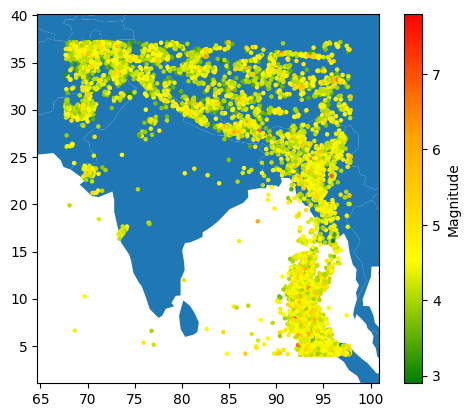

In [21]:
world_map.plot(ax=plt.gca())
sc = plt.scatter(
    longitudes,
    latitudes,
    c=magnitudes,
    cmap=cmap,
    norm=normalize,
    s=5,
    marker="o",
)

cbar = plt.colorbar(sc, orientation="vertical")
cbar.set_label("Magnitude")

plt.xlim([longitudes.min() - 3, longitudes.max() + 3])
plt.ylim([latitudes.min() - 3, latitudes.max() + 3])